## 01. package load

In [1]:
!nvidia-smi

Tue Jun  2 13:28:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/mge511_preject/

/content/drive/My Drive/mge511_preject


In [1]:
import os
import sys
import json
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.word2vec import Word2Vec
sys.path.append(os.pardir)
from models.cnn_kr import CNNClassifier
from models.word_embedding import get_embedding_matrix

### local gpu setting

In [0]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

### Assing data path

In [2]:
DATA_IN_PATH = './assets/data/npy_data/2020-05-31/'
# Data save label
TRAIN_INPUT_DATA = 'train_input.npy'
TEST_INPUT_DATA = 'test_input.npy'
DATA_CONFIGS = 'data_configs.json'
SEQ_CONFIGS = 'seq_configs_bt.json'

# Train label save file name
TRAIN_LABEL_SMALL = 'train_label_small.npy'
TEST_LABEL_DATA_SMALL = 'test_label_small.npy'

### set cnn parameter

## CNN train module parameter

+ parameter and default value

    embedding_matrix=None (word2vec or doc2vec weight matrix)  
    vocab_size=None  (train vocab size)  
    pre_trained_mode=None ('d2v', 'w2v', 'pt_w2v')  
    num_filters=128  
    hidden_dimension=1000  
    dropout_rate=0.5  
    batch_size = 512  
    num_epochs = 1000  
    valid_split = 0.2  
    optimizer = 'adam'  ('adam' or 'radam')  
    train_mode='rand ' ('rand', 'static', 'non-static') 
    
    
+ pt_w2v is pre-trained word2vec which is trained korean wikipedia doctumentation(document size : 420000) 
+ embedding_matrix and pre_trained_mode cannot assign when train_mode is 'rand'
+ embedding_matrix and pre_trained_mode can assign when train_mode is 'static' or 'non-statc'

In [3]:
from notebook_example.test_package.cnn_train import CNNTrain

## 02. Load  Data and make embedding matrix

+ Load embedding data

In [8]:
w2v_model_name = './model_save/embedding_model/Word2vec1.model'
word_vectorizer = Word2Vec.load(w2v_model_name)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


+ Load data

In [9]:
train_X = np.load(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'rb'))
train_Y = np.load(open(DATA_IN_PATH + TRAIN_LABEL_SMALL, 'rb'))
test_X = np.load(open(DATA_IN_PATH + TEST_INPUT_DATA, 'rb'))
test_Y = np.load(open(DATA_IN_PATH + TEST_LABEL_DATA_SMALL, 'rb'))
train_YS = tf.one_hot(train_Y, 455)
test_YS = tf.one_hot(test_Y, 455)
data_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))
vocab_size = data_configs['vocab_size'] + 1
print("vocab_size : ", vocab_size)
word_index = data_configs['vocab']

vocab_size :  30079


## 06. CNN non-static(w2v)

### optimizer adam

In [12]:
cnn_train_non_static_w2v = CNNTrain(vocab_size=vocab_size, 
                                    train_mode='non_static', 
                                    output_dim=455,
                                    embedding_matrix=word_vectorizer,
                                    word_index=word_index,
                                    pre_trained_mode='w2v')

small_class
output_dim :  455
./model_save/cnn_model_small/
word index size :  30079
27423 2655
train_mode : non_static, optimizer : adam, pre-trained_mode : w2v, trainable: True, model_name : cnn_non_static_adam_w2v


In [13]:
model, histroy = cnn_train_non_static_w2v.train(train_X, train_YS)

{'vocab_size': 30079, 'embedding_size': 300, 'num_filters': 128, 'dropout_rate': 0.5, 'hidden_dimension': 500, 'train_mode': 'non_static', 'output_dimension': 455, 'model_name': 'cnn_non_static_adam_w2v', 'embedding_matrix': array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05204903, -0.21638015, -0.21948703, ...,  0.14667457,
        -0.02240289,  0.05068133],
       [-0.00398654,  0.07112884, -0.51496243, ...,  0.07860778,
        -0.33473143, -0.0859189 ],
       ...,
       [-0.60012555,  0.33054775, -0.45900419, ..., -0.22507869,
         0.13599187, -0.08460996],
       [ 0.48614532,  0.02564996, -0.16735327, ...,  0.38038063,
         0.16799502, -0.66553634],
       [ 0.79622883, -0.40894818,  0.2396446 , ..., -0.12865892,
        -0.75648826,  0.38904482]]), 'trainable': True}
./model_save/cnn_model_small/cnn_non_static_adam_w2v -- Folder create complete 

callback set
Epoch 1/1000
17/17 [============================

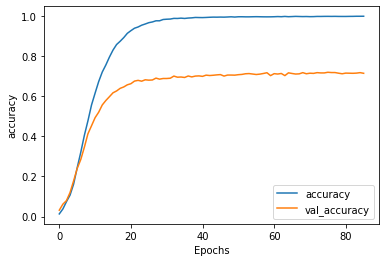

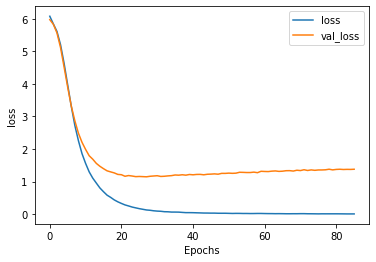

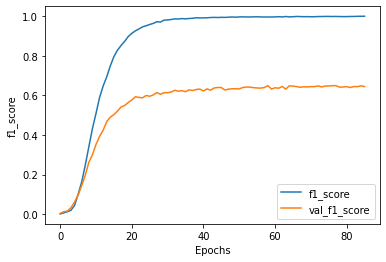

In [14]:
cnn_train_non_static_w2v.train_plot(model, histroy)

In [15]:
cnn_train_non_static_w2v.evaluation(model, test_X, test_YS)

145/145 [==============================] - 1s 5ms/step - loss: 1.3026 - accuracy: 0.7260 - f1_score: 0.6748
